In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

#### Importing Warnings for better code outputs

In [37]:
import warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning

# Ignore specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#### Loading the data

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')

#### Showing first five rows

In [3]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


#### Shape of the data

In [4]:
df.shape

(188533, 13)

#### Information the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


#### Showing the missing values of dataset

In [6]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

#### Visualizing the duplicates

In [9]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()*100/len(df)

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64

#### Visualizing the unique datas

In [7]:
df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

-----------

# Data Preprocessing

### a) Removing Unnecesary Columns

In [10]:
df.head(2)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999


In [13]:
df.drop(columns=['id','clean_title'], inplace=True)

In [14]:
df.shape

(188533, 11)

### b) Dealing with Missing values

In [15]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident        2452
price              0
dtype: int64

<Axes: xlabel='accident'>

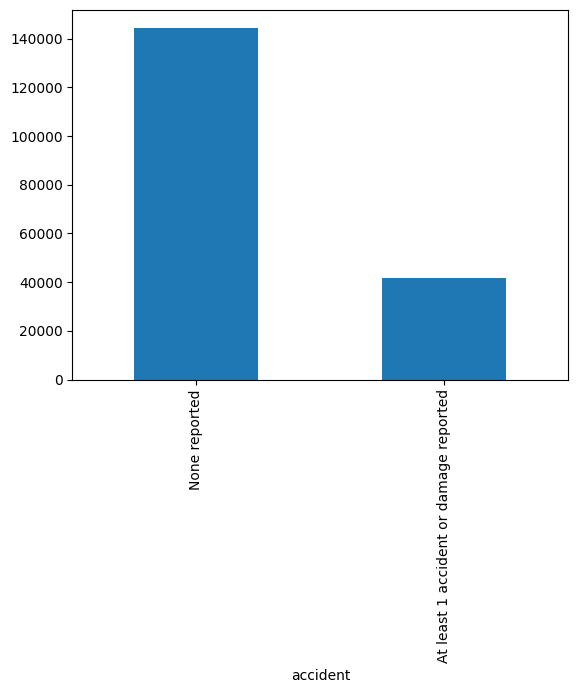

In [17]:
df['accident'].value_counts().plot(kind='bar')

#### Filling the missing values with the mode of the particular column because it containes string values.

In [19]:
df['accident']=df['accident'].fillna(df['accident'].mode()[0])

In [20]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       5083
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
price              0
dtype: int64

<Axes: xlabel='fuel_type'>

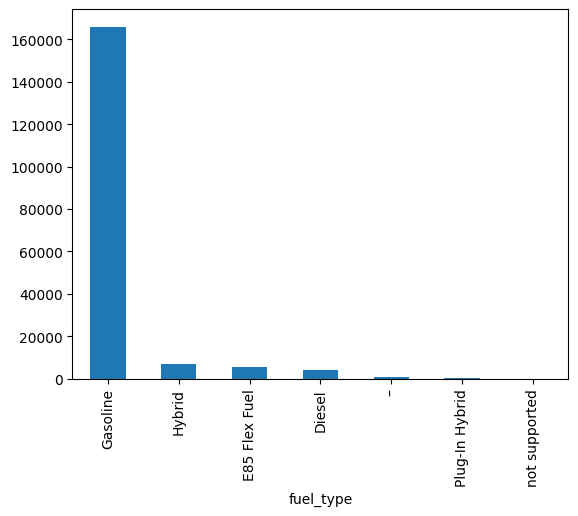

In [18]:
df['fuel_type'].value_counts().plot(kind='bar')

#### Filling the missing values with the mode of the particular column because it containes string values.

In [21]:
df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode()[0])

### Now As you can see our dataset is cleaned. There is no missing values left here.

In [22]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
price           0
dtype: int64

-----------

## Showing extra statistical measures

In [23]:
df.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


-----------

# Exploratory Data Analysis

## a) Visualizing the Distribution of numerical columns

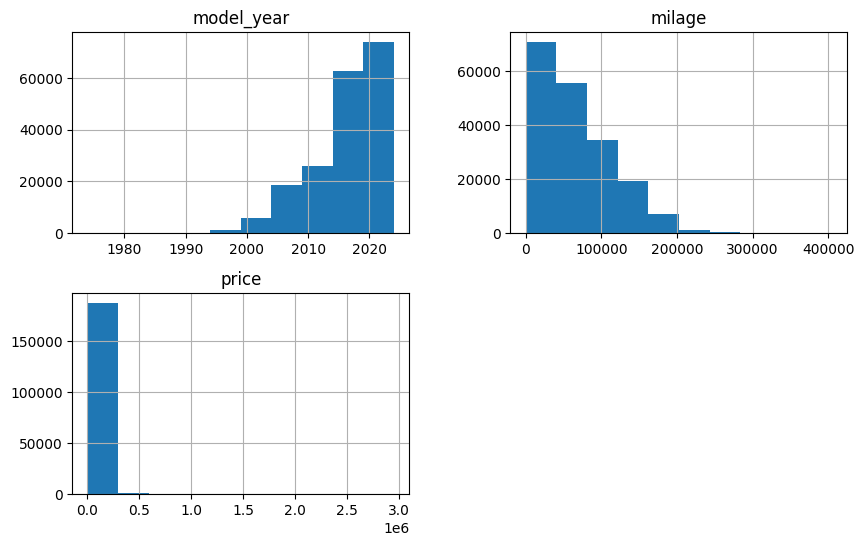

In [26]:
df.hist(figsize=(10,6))
plt.show()

## b) Showing Numerical Columns

In [31]:
num_cols=df.select_dtypes(include='int64').columns

num_cols

Index(['model_year', 'milage', 'price'], dtype='object')

#### Visualizing the distribution plot and boxplot of numerical columns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


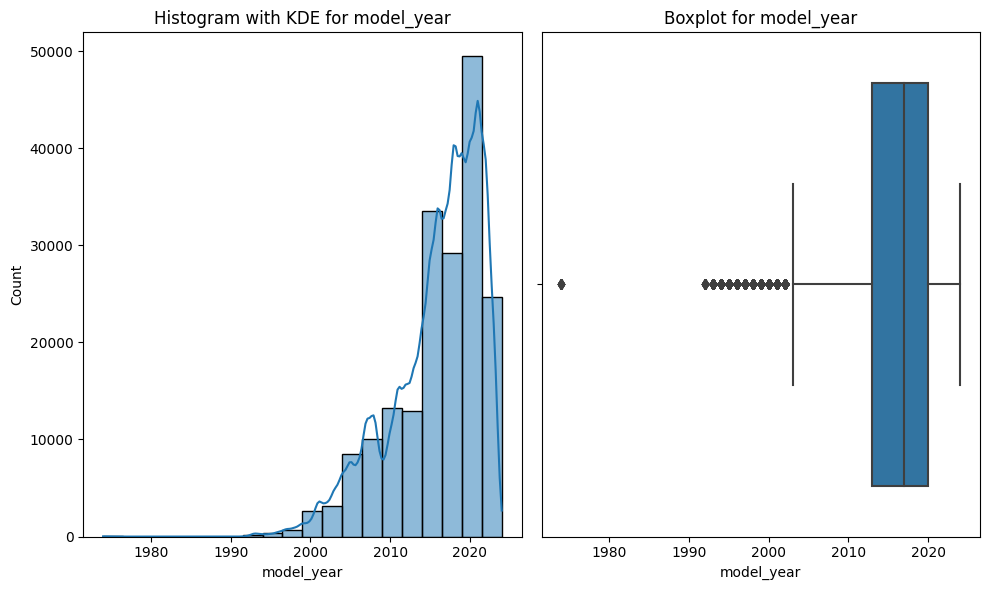

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


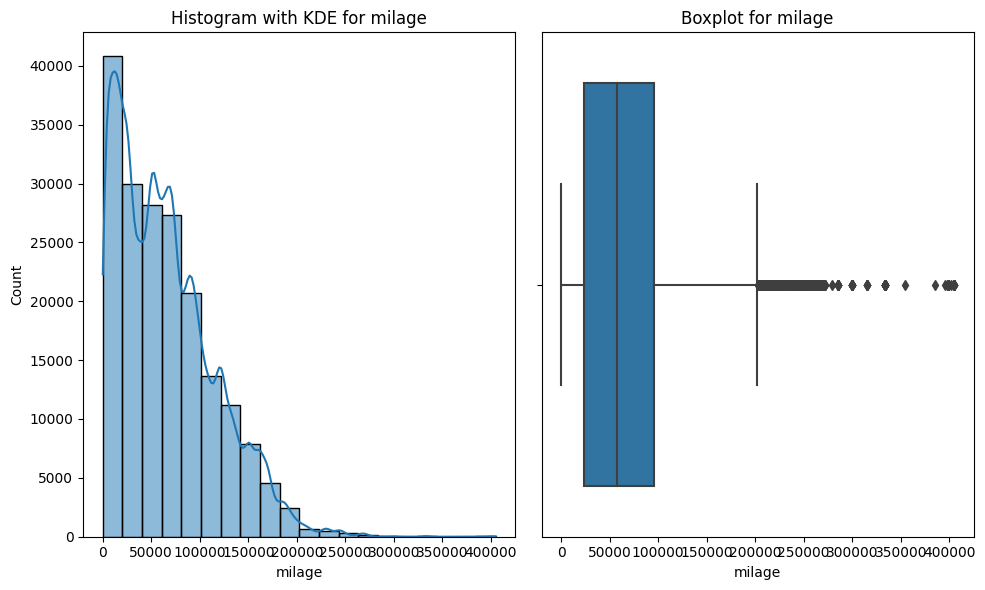

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


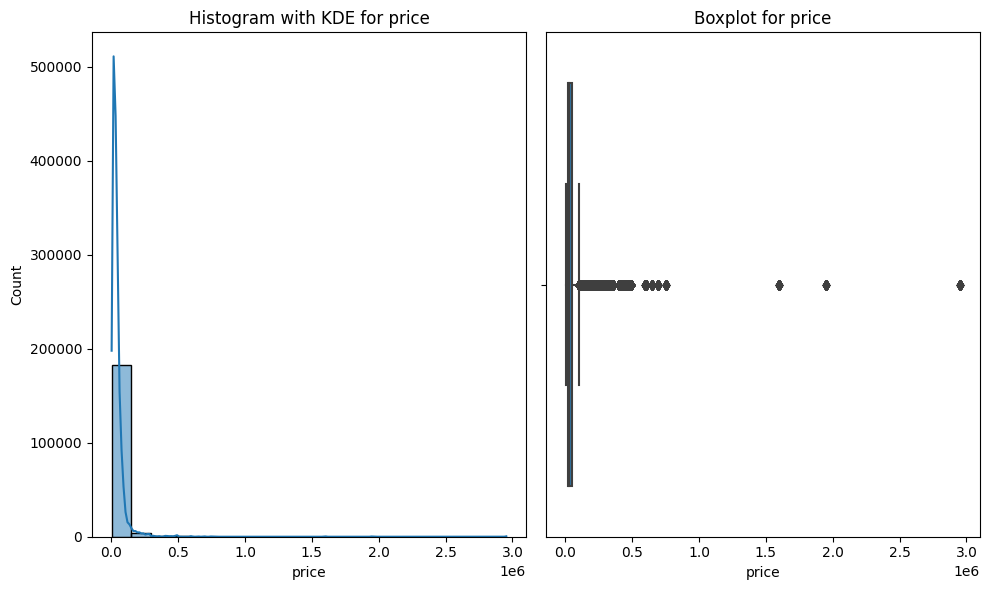

In [41]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    
    sn.histplot(x=col,data=df, kde=True, bins=20,ax=axes[0])
    axes[0].set_title(f'Histogram with KDE for {col}')
    
    
    sn.boxplot(x=col,data=df,ax=axes[1])
    axes[1].set_title(f'Boxplot for {col}')
    
    plt.tight_layout()
    plt.show()
    

## C) Encoding Categorical Columns

In [42]:
cat_cols=df.select_dtypes(include='object').columns

cat_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident'],
      dtype='object')

#### Showing Value Counts of Categorical Columns

In [51]:
for col in cat_cols:
    results=df[col].value_counts()
    print(results)
    print("--------------------------------------------------")

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

### Label Encoding of Categorical Columns

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
lb=LabelEncoder()

In [54]:
for col in cat_cols:
    df[col]=lb.fit_transform(df[col])

#### After LabelEncoding

In [55]:
for col in cat_cols:
    results=df[col].value_counts()
    print(results)
    print("--------------------------------------------------")

brand
14    23088
36    19172
4     17028
9     16335
3     10887
43    10612
26     9525
53     8850
27     8643
22     6474
8      4674
44     4249
39     3930
52     3738
20     3276
15     3215
11     3133
34     2719
24     2497
28     2423
50     2381
0      2282
17     2101
19     2045
54     1765
21     1319
5      1155
31     1064
16      969
7       940
32      939
25      809
10      727
55      723
1       682
45      590
46      561
38      551
42      538
18      520
13      359
35      243
2       238
48      148
49      120
30       69
37       57
29       52
12       44
47       22
23       17
51        8
40        7
6         7
41        7
56        3
33        3
Name: count, dtype: int64
--------------------------------------------------
model
670     2945
970     2229
401     1709
976     1622
1122    1526
        ... 
882        2
1795       1
1804       1
1852       1
906        1
Name: count, Length: 1897, dtype: int64
--------------------------------------------

## d) Showing the correlation between the variables

<Axes: >

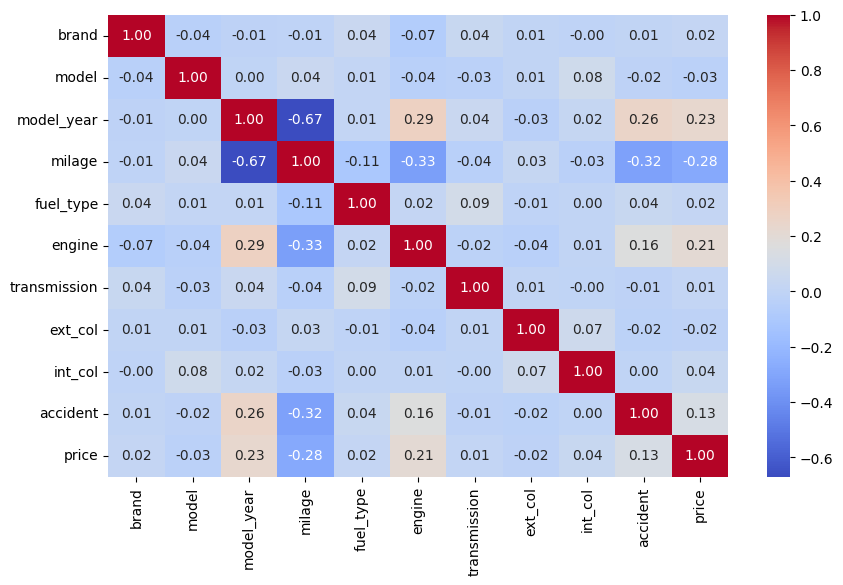

In [56]:
plt.figure(figsize=(10,6))

sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

## e) Showing the correlation With the respect to labeled column

<Axes: >

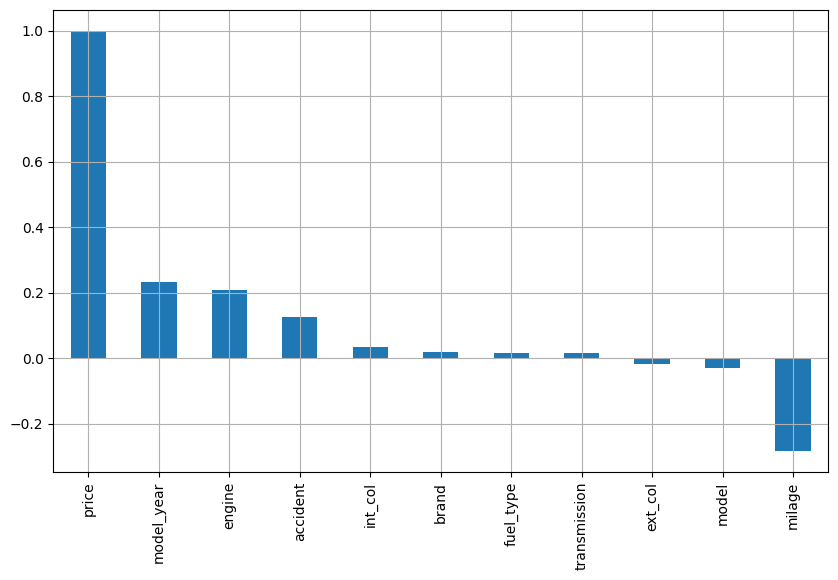

In [58]:
df.corr()['price'].sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(10,6))

-----------

# Train Test Split

In [59]:
X=df.drop('price', axis=1)
Y=df['price']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(188533, 10) (150826, 10) (37707, 10)


-----------

# Scaling the data

In [63]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [64]:
X_train

array([[-0.57704792, -0.28824711,  0.38187488, ..., -1.12091074,
        -0.52631449,  0.53234966],
       [-1.20675453,  1.76985156,  0.5587324 , ..., -1.12091074,
         2.08357046,  0.53234966],
       [-0.51407725,  1.93097019,  0.73558993, ..., -1.12091074,
        -0.52631449, -1.87846462],
       ...,
       [-0.07328263,  1.73532614,  0.73558993, ..., -0.29208335,
        -0.52631449,  0.53234966],
       [ 1.24910126, -1.34894475,  1.08930498, ...,  0.66761152,
        -0.52631449,  0.53234966],
       [-1.26972519, -1.29332046,  0.02815982, ...,  1.27832644,
        -0.52631449,  0.53234966]])

-------------------

# Model Training

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Creating a custom function for Metrics

In [85]:
def metrices_info(model):
    y_pred=model.predict(X_test)
    
    test_r2_score=r2_score(Y_test, y_pred)
    mse=mean_squared_error(Y_test,y_pred)
    mae=mean_absolute_error(Y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    
    y1_pred=model.predict(X_train)
    
    train_r2_score=r2_score(Y_train,y1_pred)
    
    print("Train R2 score: ",train_r2_score)
    print("Test R2 score: ", test_r2_score)
    print("Mean Absolute Error (MAE)",mae)
    print("Mean Squared Error (MSE)",mse)
    print("Root Mean Squared Error (MSE)",rmse)

## a) Linear Regression

In [86]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

#### i) Metrices Information

In [87]:
metrices_info(lr)

Train R2 score:  0.09692896706197696
Test R2 score:  0.11154978134772897
Mean Absolute Error (MAE) 22829.108066410594
Mean Squared Error (MSE) 4795465813.309118
Root Mean Squared Error (MSE) 69249.30189763012


---------

### c) XGboost

In [88]:
xg=XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### i) Metrices Information

In [89]:
metrices_info(xg)

Train R2 score:  0.44568170588365263
Test R2 score:  0.0891893935570992
Mean Absolute Error (MAE) 20186.403424212847
Mean Squared Error (MSE) 4916157409.721757
Root Mean Squared Error (MSE) 70115.31508680366


#### ii) Feature Importances

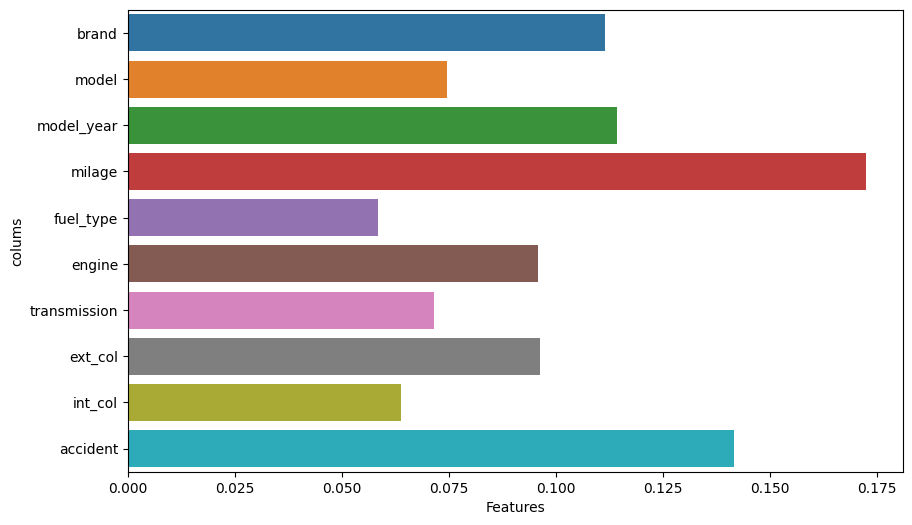

In [183]:
xg_features=pd.DataFrame({'colums':X.columns, 'Features':xg.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=xg_features)

plt.show()

-----------

### d) LGBM

In [90]:
lgm=LGBMRegressor()
lgm.fit(X_train,Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Number of data points in the train set: 150826, number of used features: 10
[LightGBM] [Info] Start training from score 44024.195590


LGBMRegressor()

#### i) Metrices Information

In [91]:
metrices_info(lgm)

Train R2 score:  0.22994739198975678
Test R2 score:  0.15596735422729724
Mean Absolute Error (MAE) 19333.768587242397
Mean Squared Error (MSE) 4555719176.094881
Root Mean Squared Error (MSE) 67496.06785654169


#### ii) Feature Importances

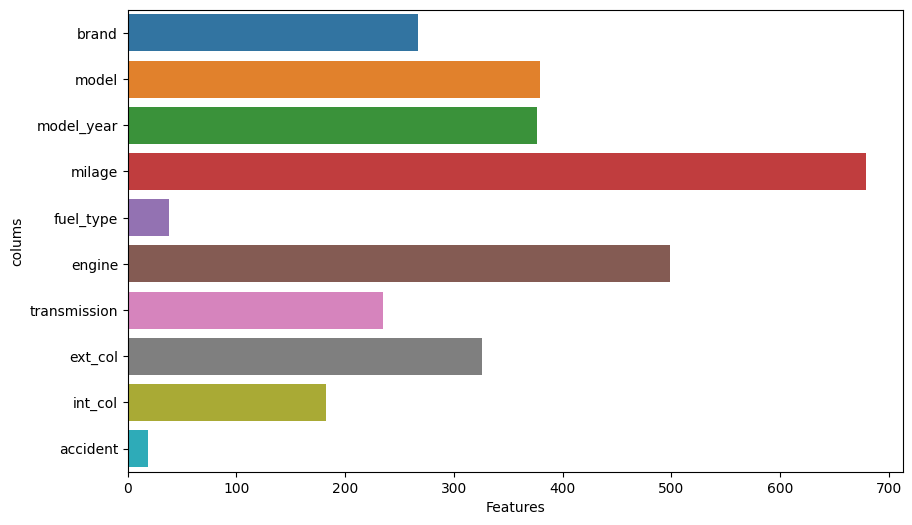

In [184]:
lgm_features=pd.DataFrame({'colums':X.columns, 'Features':lgm.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=lgm_features)

plt.show()

-----------

### e) Catboost

In [92]:
ct=CatBoostRegressor()

ct.fit(X_train,Y_train)

Learning rate set to 0.090444
0:	learn: 79335.8142776	total: 18.5ms	remaining: 18.5s
1:	learn: 78691.0845458	total: 33.9ms	remaining: 16.9s
2:	learn: 78117.3015235	total: 50.5ms	remaining: 16.8s
3:	learn: 77626.4219957	total: 67.7ms	remaining: 16.9s
4:	learn: 77208.3754960	total: 84.2ms	remaining: 16.7s
5:	learn: 76875.1982798	total: 101ms	remaining: 16.7s
6:	learn: 76586.3466113	total: 117ms	remaining: 16.7s
7:	learn: 76342.5530917	total: 134ms	remaining: 16.6s
8:	learn: 76125.0775952	total: 151ms	remaining: 16.6s
9:	learn: 75932.9009662	total: 167ms	remaining: 16.6s
10:	learn: 75781.1357581	total: 185ms	remaining: 16.6s
11:	learn: 75620.4256852	total: 203ms	remaining: 16.7s
12:	learn: 75492.2472289	total: 220ms	remaining: 16.7s
13:	learn: 75393.2623946	total: 236ms	remaining: 16.6s
14:	learn: 75303.8167116	total: 252ms	remaining: 16.5s
15:	learn: 75209.6896343	total: 266ms	remaining: 16.4s
16:	learn: 75123.9034891	total: 283ms	remaining: 16.4s
17:	learn: 75047.7152598	total: 301ms	re

#### i) Metrices Information

In [93]:
metrices_info(ct)

Train R2 score:  0.3504559101159458
Test R2 score:  0.13968175914909653
Mean Absolute Error (MAE) 19525.288548667395
Mean Squared Error (MSE) 4643621697.595045
Root Mean Squared Error (MSE) 68144.1244539472


#### ii) Feature Importances

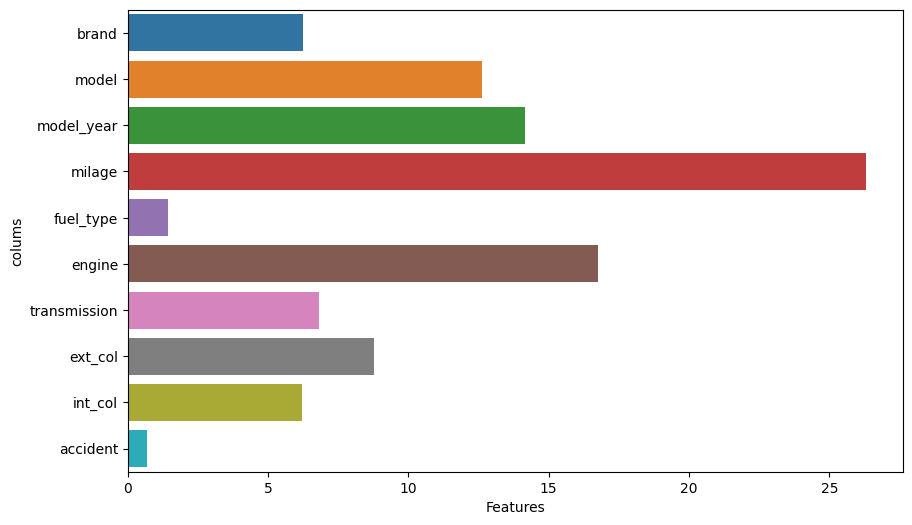

In [185]:
cat_features=pd.DataFrame({'colums':X.columns, 'Features':ct.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=cat_features)

plt.show()

-----------

### f) Gradient Boosting Classifier

In [94]:
gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

#### i) Metrices Information

In [95]:
metrices_info(gr)

Train R2 score:  0.15874049621669484
Test R2 score:  0.1572837598527077
Mean Absolute Error (MAE) 19411.289821637278
Mean Squared Error (MSE) 4548613794.115596
Root Mean Squared Error (MSE) 67443.4117917799


#### ii) Feature Importances

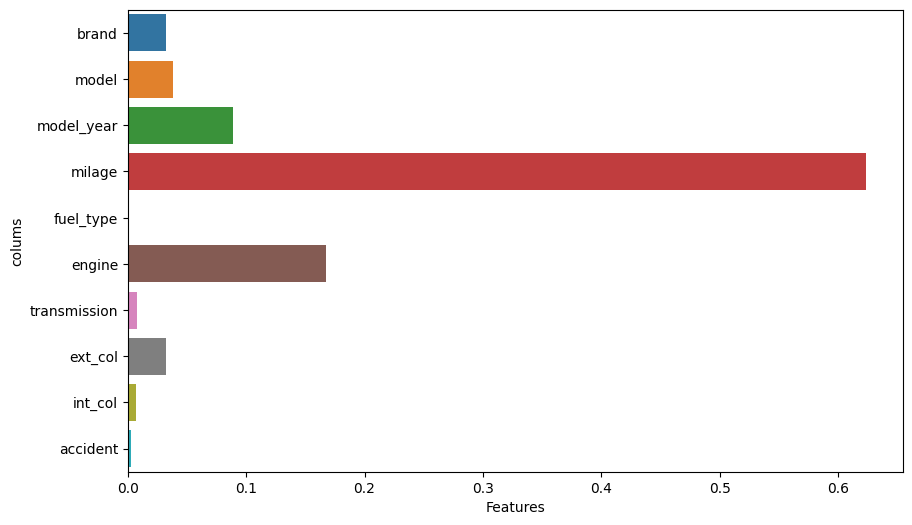

In [186]:
gr_features=pd.DataFrame({'colums':X.columns, 'Features':gr.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=gr_features)

plt.show()

-----------

# Test Set

#### Showing the test dataset

In [113]:
test_df=pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

#### Showing the first five rows of test dataset

In [114]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


#### Coping the test dataset for future calculations

In [115]:
test_df_copy=test_df.copy()

#### Showing the shape of test dataset

In [116]:
test_df.shape

(125690, 12)

### Data Preprocessing

#### Dropping unimportant columns

In [117]:
test_df.drop('id', axis=1,inplace=True)

In [118]:
test_df.shape

(125690, 11)

#### Showing the null of test dataset

In [119]:
test_df.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

#### Showing the duplicate rows of test dataset

In [120]:
test_df.duplicated().sum()

0

In [121]:
test_df.drop('clean_title', axis=1,inplace=True)

In [122]:
test_df.shape

(125690, 10)

In [123]:
test_df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type       3383
engine             0
transmission       0
ext_col            0
int_col            0
accident        1632
dtype: int64

In [124]:
test_df['accident']=test_df['accident'].fillna(test_df['accident'].mode()[0])

In [125]:
test_df['fuel_type']=test_df['fuel_type'].fillna(test_df['fuel_type'].mode()[0])

#### Now our test dataset is cleaned for future predictions

In [126]:
test_df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
dtype: int64

### Label Encoding for Categorical Columns

In [128]:
test_cols=test_df.select_dtypes(include=['object']).columns

test_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident'],
      dtype='object')

#### Before LabelEncoding

In [129]:
for col in test_cols:
    results=test_df[col].value_counts()
    print(results)
    print("--------------------------------------------------")

brand
Ford             15265
Mercedes-Benz    12875
BMW              11286
Chevrolet        10698
Audi              7289
Porsche           7153
Land              6348
Toyota            6084
Lexus             5729
Jeep              4412
Cadillac          3059
RAM               2753
Nissan            2674
Tesla             2387
INFINITI          2123
GMC               2094
Dodge             2071
Mazda             1770
Kia               1750
Lincoln           1593
Subaru            1591
Acura             1567
Honda             1436
Hyundai           1308
Volkswagen        1222
Jaguar             934
Bentley            789
MINI               697
Buick              651
Genesis            643
Maserati           619
Volvo              576
Lamborghini        547
Chrysler           514
Alfa               467
Rivian             390
Rolls-Royce        383
Mitsubishi         367
Hummer             342
Pontiac            341
Ferrari            251
McLaren            165
Aston              144
Satur

In [130]:
for col in test_cols:
    test_df[col]=lb.fit_transform(test_df[col])

#### After LabelEncoding

In [131]:
for col in test_cols:
    results=test_df[col].value_counts()
    print(results)
    print("--------------------------------------------------")

brand
14    15265
36    12875
4     11286
9     10698
3      7289
42     7153
26     6348
52     6084
27     5729
22     4412
8      3059
43     2753
39     2674
51     2387
20     2123
15     2094
11     2071
34     1770
24     1750
28     1593
49     1591
0      1567
17     1436
19     1308
53     1222
21      934
5       789
31      697
7       651
16      643
32      619
54      576
25      547
10      514
1       467
44      390
45      383
38      367
18      342
41      341
13      251
35      165
2       144
47       97
48       62
30       42
37       39
12       37
29       19
46       11
23       10
33        7
40        4
6         3
50        2
Name: count, dtype: int64
--------------------------------------------------
model
670     1923
968     1412
401     1111
974     1005
1120     938
        ... 
1578       1
624        1
516        1
1758       1
515        1
Name: count, Length: 1891, dtype: int64
--------------------------------------------------
fuel_type
2    11

-----------

### Scaling the data

In [132]:
test=sc.transform(test_df)

-----------

### Model Training and Predicting

In [175]:
predictions=model_2.predict(test)

-----------

## Kaggle Submission

In [176]:
sub=pd.DataFrame({'id':test_df_copy['id'], 'price':predictions})

sub

,id,price
0,188533,17417.234375
1,188534,81088.601562
2,188535,57063.183594
3,188536,22579.902344
4,188537,30101.492188
...,...,...
125685,314218,29426.941406
125686,314219,50276.250000
125687,314220,21843.419922
125688,314221,17240.021484


#### Converting the dataset into a csv for submission

In [177]:
sub.to_csv('hyper_xg_Submission.csv', index=False)

-----------

# Hyper Parameter Tuning

In [139]:
from sklearn.model_selection import RandomizedSearchCV

#### Creating important Model Paramaters

In [144]:
param_grid={
    'max_depth':[3,5,7],
    'min_samples_leaf':[10,50,100],
    'min_samples_split':[30,150,300],
    'n_estimators':[10,30,50],
    'max_features':['sqrt','log2']
}

-----------

### 1) For Gradient Boosting

In [145]:
gr_model=RandomizedSearchCV(gr,param_grid,cv=5,random_state=123)

gr_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 50, 100],
                                        'min_samples_split': [30, 150, 300],
                                        'n_estimators': [10, 30, 50]},
                   random_state=123)

In [146]:
gr_model.best_estimator_

GradientBoostingRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=10,
                          min_samples_split=300, n_estimators=50)

In [147]:
gr_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 300,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 7}

In [148]:
gr_model.best_score_

0.1434675272183356

#### Training with the New Parameters

In [149]:
params={'n_estimators': 50,
 'min_samples_split': 300,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 7}

In [150]:
gr_new_model=GradientBoostingRegressor(**params)
gr_new_model.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=10,
                          min_samples_split=300, n_estimators=50)

#### i) Metrices Information

In [151]:
metrices_info(gr_new_model)

Train R2 score:  0.18048400762942451
Test R2 score:  0.16178267420897807
Mean Absolute Error (MAE) 19235.714874101828
Mean Squared Error (MSE) 4524330621.530837
Root Mean Squared Error (MSE) 67263.14460037411


#### ii) Feature Importances

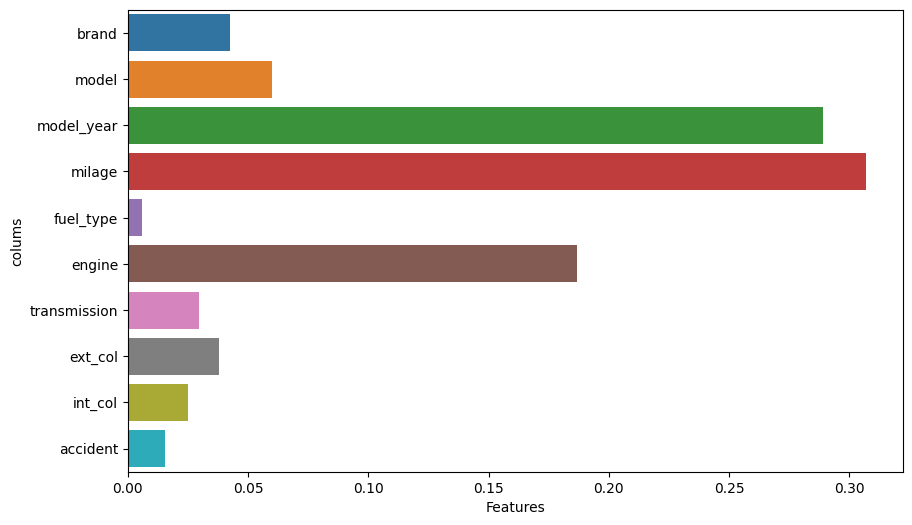

In [187]:
gr_new_features=pd.DataFrame({'colums':X.columns, 'Features':gr_new_model.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=gr_new_features)

plt.show()

-----------

### 2) Light Gradient Boosting

In [153]:
lgm_model=RandomizedSearchCV(lgm,param_grid, cv=5, random_state=123)

lgm_model.fit(X_train,Y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Numb

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 50, 100],
                                        'min_samples_split': [30, 150, 300],
                                        'n_estimators': [10, 30, 50]},
                   random_state=123)

In [154]:
lgm_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 30,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 5}

In [155]:
lgm_model.best_estimator_

LGBMRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=50,
              min_samples_split=30, n_estimators=50)

In [156]:
lgm_model.best_score_

0.14171833904683076

In [157]:
params={'n_estimators': 50,
 'min_samples_split': 30,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 5}

In [158]:
lgm_new_model=LGBMRegressor(**params)
lgm_new_model.fit(X_train,Y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1279
[LightGBM] [Info] Numb

LGBMRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=50,
              min_samples_split=30, n_estimators=50)

#### i) Metrices Information

In [159]:
metrices_info(lgm_new_model)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=50. Current value: min_data_in_leaf=50
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train R2 score:  0.15737286057325106
Test R2 score:  0.15913121745860392
Mean Absolute Error (MAE) 19233.760134547167
Mean Squared Error (MSE) 4538642025.743417
Root Mean Squared Error (MSE) 67369.4443033592


#### ii) Feature Importances

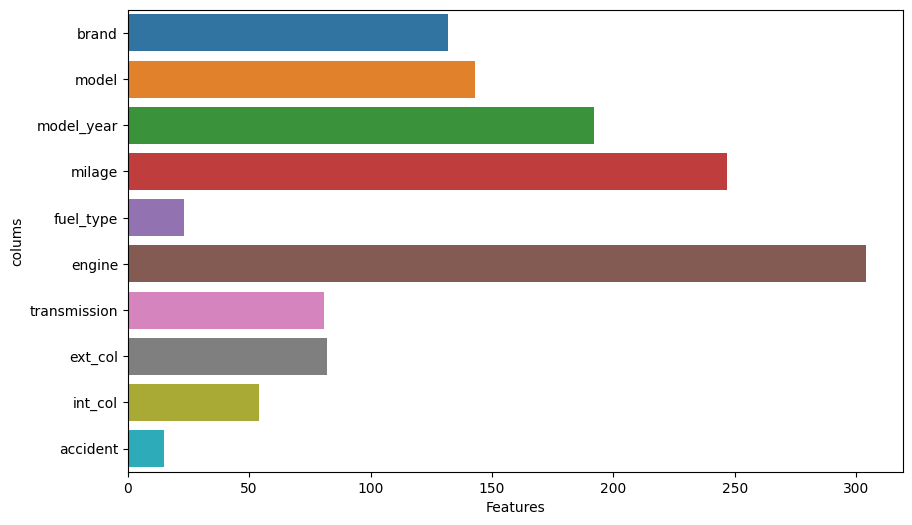

In [188]:
lgmm_new_features=pd.DataFrame({'colums':X.columns, 'Features':lgm_new_model.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=lgmm_new_features)

plt.show()

-----------

### 3) For XGboost

#### Part 1

In [164]:
params_xgb = {
    'learning_rate': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.5,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'n_estimators': 200,
    'seed': 42
}
model_2 = XGBRegressor(**params_xgb)
model_2.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### i) Metrices Information

In [165]:
metrices_info(model_2)

Train R2 score:  0.20435776282257456
Test R2 score:  0.16464265017106072
Mean Absolute Error (MAE) 19253.263608440167
Mean Squared Error (MSE) 4508893721.786632
Root Mean Squared Error (MSE) 67148.2964920677


#### ii) Feature Importances

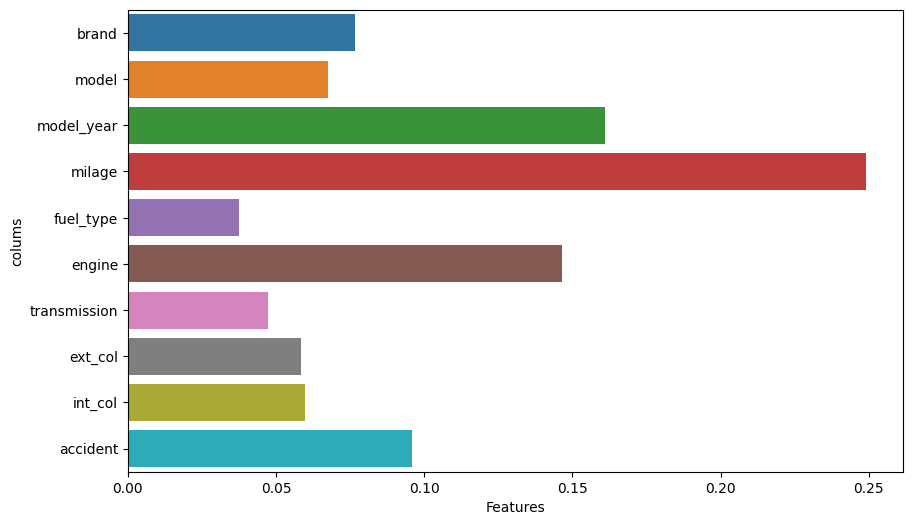

In [189]:
xgg_new_features=pd.DataFrame({'colums':X.columns, 'Features':model_2.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=xgg_new_features)

plt.show()

-----------

#### Part 2

In [167]:
xg_new_model=RandomizedSearchCV(xg, param_grid, cv=5, random_state=123)

xg_new_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [10, 50, 100],
                                        'min_samples_split': [30, 150, 300],
                                        'n_estimators': [10, 30, 50]},
                   random_state=123)

In [168]:
xg_new_model.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_features='log2',
             max_leaves=None, min_child_weight=None, min_samples_leaf=50,
             min_samples_split=30, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, ...)

In [169]:
xg_new_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 30,
 'min_samples_leaf': 50,
 'max_features': 'log2',
 'max_depth': 5}

In [170]:
xg_new_model.best_score_

0.1358773982900436

In [171]:
params={'n_estimators': 10,
 'min_samples_split': 30,
 'min_samples_leaf': 50,
 'max_features': 'log2',
 'max_depth': 5}

In [172]:
xg_m=XGBRegressor(**params)

xg_m.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_features='log2',
             max_leaves=None, min_child_weight=None, min_samples_leaf=50,
             min_samples_split=30, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, ...)

#### i) Metrices Information

In [173]:
metrices_info(xg_m)

Train R2 score:  0.1615148519187083
Test R2 score:  0.15535245377539664
Mean Absolute Error (MAE) 19383.34324046886
Mean Squared Error (MSE) 4559038139.874474
Root Mean Squared Error (MSE) 67520.64972935668


#### ii) Feature Importances

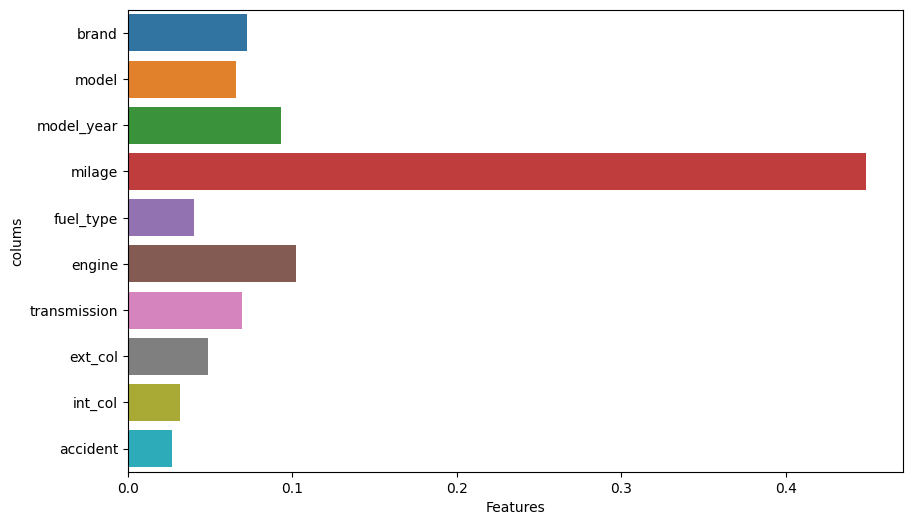

In [190]:
xggm_new_features=pd.DataFrame({'colums':X.columns, 'Features':xg_m.feature_importances_})

plt.figure(figsize=(10,6))
sn.barplot(y='colums', x='Features', data=xggm_new_features)

plt.show()

-----------

# Saving the Models

In [191]:
import joblib

In [192]:
joblib.dump(lb,open('LabelEncoder.pkl','wb'))
joblib.dump(sc,open('StandardScaler.pkl','wb'))
joblib.dump(xg,open('XGBoost.pkl','wb'))

# Prediction Function

In [193]:
test_df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident'],
      dtype='object')

In [210]:
def predict_price(brand, model, model_year, milage, fuel_type, engine,
       transmission, ext_col, int_col, accident,sc,lb,xg):
    
    features=[[brand, model, model_year, milage, fuel_type, engine,transmission, ext_col, int_col, accident]]
    
    scaled_features=sc.transform(features)
    
    result=xg.predict(scaled_features)
    
    return result

#### Test Case

In [211]:
df.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,31,495,2007,213000,2,116,38,312,71,1,4200


In [213]:
brand=31
model=495
model_year=2007
milage=213000
fuel_type=2
engine=116
transmission=38
ext_col=312
int_col=71
accident=1

result=predict_price(brand, model, model_year, milage, fuel_type, engine,transmission, ext_col, int_col, accident,sc,lb,xg)

print('Prediction of Used car price: ',result)

Prediction of Used car price:  [5973.9033]


---------